# Visualize transport maps and weights of synthetic experiments (NubOT vs ubOT GAN)

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from unot.plotting.setup import setup_plt

palette_big = [
        "#1A254B",
        "#114083",
        "#386cb5",
        "#A7BED3",
        "#c3cdd6",
        "#cccccc",
        "#d1bebe",
        "#e08285",
        "#F2545B",
        "#A4243B",
        "#8c0e25",
    ]
setup_plt()

/Users/frederike/Documents/ETH/OT/unot/unot/plotting/setup.py:33: UserWarning: Trying to register the cmap 'BBR' which already exists.
  plt.register_cmap(cmap=cmap1)
/Users/frederike/Documents/ETH/OT/unot/unot/plotting/setup.py:38: UserWarning: Trying to register the cmap 'BBR_r_sharp' which already exists.
  plt.register_cmap(cmap=cmap2)
/Users/frederike/Documents/ETH/OT/unot/unot/plotting/setup.py:41: UserWarning: Trying to register the cmap 'BBR_r' which already exists.
  plt.register_cmap(cmap=cmap3)


In [3]:
setup = "A"
model = "model-nubot_v1"
model = "model-gan"

exp_dir = "toy_submission"
if setup == "A":
    outdir = Path(f"../results/{exp_dir}/inner_triangle_balanced_outer_triangle_unbalanced_1/{model}/evals")
elif setup == "B":
    outdir = Path(f"../results/{exp_dir}/inner_triangle_balanced_outer_triangle_unbalanced_3/{model}/evals")
elif setup == "C":
    if exp_dir == "toy_submission":
        outdir = Path(f"../results/{exp_dir}/outer_triangle_unbalanced_1_inner_triangle_unbalanced_1_flipped/{model}/evals/")
    else:
        outdir = Path(f"../results/{exp_dir}/inner_triangle_unbalanced_1_flipped_outer_triangle_unbalanced_1/{model}/evals/")

In [4]:
imputed = pd.read_csv(outdir / "imputed.csv", index_col=0).to_numpy()
treated = pd.read_csv(outdir / "treated.csv", index_col=0).to_numpy()
control = pd.read_csv(outdir / "control.csv", index_col=0).to_numpy()
weights = pd.read_csv(outdir / "weights.csv", index_col=0).to_numpy()

In [5]:
cl1 = np.where(control[:,1] < 0, True, False)
cl2 = np.where(control[:,1] > 0, True, False) & np.where(control[:,0] > 0, True, False)
cl3 = np.where(control[:,1] > 0, True, False) & np.where(control[:,0] < 0, True, False)

weights[cl1].mean(), weights[cl2].mean(), weights[cl3].mean()

(1.0200128928467154, 0.9914229024218749, 0.800800891037037)

In [6]:
lower = np.where(control[:,1] < 0, True, False)
right = np.where(control[:,1] > 0, True, False) & np.where(control[:,0] > 0, True, False)
left = np.where(control[:,1] > 0, True, False) & np.where(control[:,0] < 0, True, False)

if setup == "A":
    true_weights = np.zeros(weights.shape)
    true_weights[lower] = 1.35
    true_weights[left] = 0.3
    true_weights[right] = 1.35
elif setup == "B":
    true_weights = np.zeros(weights.shape)
    true_weights[lower] = 2.1
    true_weights[left] = 0.3
    true_weights[right] = 0.6
elif setup == "C":
    true_weights = np.zeros(weights.shape)
    true_weights[lower] = 0.22
    true_weights[left] = 4.5
    true_weights[right] = 1.0

In [7]:
sns.set_context(context="talk", font_scale=1.3)
plt.rcParams["font.family"] = "serif"#"Times New Roman"

def plot_row(control,treated,imputed, weights, title=""):

    fig, axes = plt.subplots(
            nrows=1, ncols=2, sharex=False, sharey=False, figsize=(6.66, 3), constrained_layout=True
        )

    def show_avg_w(lower, left, right):
        plt.text(x=1.8, y=-5.5, s=round(lower,2), color="grey")
        plt.text(x=-5, y=1.5, s=round(left,2), color="grey")
        plt.text(x=4, y=1.5, s=round(right,2), color="grey")

    
    def compute_avg_w(x, w):
        # lower 
        mask = x[:,1] < 0
        nlower = mask.sum()
        lower = w[mask].mean()

        # left
        mask = (x[:,1] > 0) & (x[:,0] < 0)
        nleft = mask.sum()
        left = w[mask].mean()

        # right
        mask = (x[:,1] > 0) & (x[:,0] > 0)
        nright = mask.sum()
        right = w[mask].mean()

        assert nlower+nleft+nright == len(x)
        assert np.isclose(nlower*lower.sum()+nleft*left.sum()+nright*right.sum(),w.sum())

        return lower, left, right

    for i in range(axes.shape[0]):
        axes[i].spines["top"].set_visible(False)
        axes[i].spines["right"].set_visible(False)


    s=4
    alpha=0.6

    # if model == "model-nubot_v1":


    #     plt.sca(axes[0])
    #     plt.scatter(control[:,0], control[:,1], color=palette_big[5], alpha=alpha,label="source", s=s)
    #     plt.scatter(treated[:,0], treated[:,1], color=palette_big[1], alpha=alpha,label="target", s=s)
    #     plt.title("Setup")

    #     plt.tick_params(
    #                 axis="both",  # changes apply to the x-axis
    #                 which="both",  # both major and minor ticks are affected
    #                 bottom=False,  # ticks along the bottom edge are off
    #                 top=False,  # ticks along the top edge are off
    #                 labelbottom=False,
    #                 left=False,
    #                 right=False,
    #                 labelleft=False,
    #             )
    # else:

    #     plt.sca(axes[0])
    #     plt.scatter(control[:,0], control[:,1], c=true_weights, alpha=alpha,label="source", s=s)
    #     #plt.colorbar(ticks=MaxNLocator(integer=True))
    #     plt.colorbar()
    #     plt.set_cmap(cmap="BBR_r")
    #     plt.clim(0,2)
    #     plt.title("Weights (True)")
    #     plt.tick_params(
    #                 axis="both",  # changes apply to the x-axis
    #                 which="both",  # both major and minor ticks are affected
    #                 bottom=False,  # ticks along the bottom edge are off
    #                 top=False,  # ticks along the top edge are off
    #                 labelbottom=False,
    #                 left=False,
    #                 right=False,
    #                 labelleft=False,
    #         )

        # show_avg_w(*compute_avg_w(control, true_weights))


    plt.sca(axes[0])
    plt.scatter(control[:,0], control[:,1], color=palette_big[5], alpha=alpha,label="source", s=s)
    plt.scatter(imputed[:,0], imputed[:,1], color=palette_big[-3], alpha=alpha,label="predicted", s=s)

    for i in range(len(control)):
        dx = imputed[i, 0] - control[i, 0]
        dy = imputed[i, 1] - control[i, 1]
        plt.arrow(control[i, 0], control[i, 1], dx, dy, alpha=0.01, color="grey", width=0.0001)
    plt.tick_params(
                axis="both",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=False,  # ticks along the bottom edge are off
                top=False,  # ticks along the top edge are off
                labelbottom=False,
                left=False,
                right=False,
                labelleft=False,
            )

    plt.title("Predictions")


    plt.sca(axes[1])

    plt.scatter(control[:,0], control[:,1], c=weights, alpha=alpha,label="source", s=s)
    #plt.colorbar(ticks=MaxNLocator(integer=True))
    plt.colorbar()
    plt.set_cmap(cmap="BBR_r")
    plt.clim(0,2)
    plt.title("Weights")
    plt.tick_params(
                axis="both",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=False,  # ticks along the bottom edge are off
                top=False,  # ticks along the top edge are off
                labelbottom=False,
                left=False,
                right=False,
                labelleft=False,
            )

    show_avg_w(*compute_avg_w(control, weights))


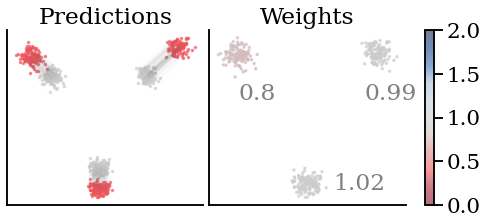

In [8]:
plot_row(control,treated, imputed, weights)
#plt.savefig(f"toy_{setup}_{model}_REBUTTAL_2.pdf", format="pdf", bbox_inches="tight")

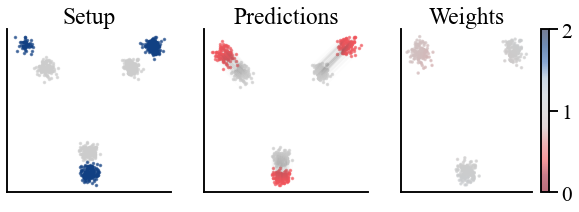

In [9]:
sns.set_context(context="talk", font_scale=1.3)
plt.rcParams["font.family"] = "Times New Roman"
fig, axes = plt.subplots(
        nrows=1, ncols=3, sharex=False, sharey=False, figsize=(10, 3)
    )
# for i in range(axes.shape[0]):
#     for j in range(axes.shape[1]):
#         axes[i,j].spines["top"].set_visible(False)
#         axes[i,j].spines["right"].set_visible(False)

for i in range(axes.shape[0]):
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

s=4
alpha=0.6
plt.sca(axes[0])
plt.scatter(control[:,0], control[:,1], color=palette_big[5], alpha=alpha,label="source", s=s)
plt.scatter(treated[:,0], treated[:,1], color=palette_big[1], alpha=alpha,label="target", s=s)
plt.title("Setup")

plt.tick_params(
            axis="both",  # changes apply to the x-axis
            which="both",  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            labelbottom=False,
            left=False,
            right=False,
            labelleft=False,
        )


plt.sca(axes[1])
plt.scatter(control[:,0], control[:,1], color=palette_big[5], alpha=alpha,label="source", s=s)
plt.scatter(imputed[:,0], imputed[:,1], color=palette_big[-3], alpha=alpha,label="predicted", s=s)

for i in range(len(control)):
    dx = imputed[i, 0] - control[i, 0]
    dy = imputed[i, 1] - control[i, 1]
    plt.arrow(control[i, 0], control[i, 1], dx, dy, alpha=0.01, color="grey", width=0.0001)
plt.tick_params(
            axis="both",  # changes apply to the x-axis
            which="both",  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            labelbottom=False,
            left=False,
            right=False,
            labelleft=False,
        )

plt.title("Predictions")

plt.sca(axes[2])
plt.scatter(control[:,0], control[:,1], c=weights, alpha=alpha,label="source", s=s)
#plt.colorbar(ticks=MaxNLocator(integer=True))
plt.colorbar()
plt.set_cmap(cmap="BBR_r")
plt.clim(0,2)
plt.title("Weights")
plt.tick_params(
            axis="both",  # changes apply to the x-axis
            which="both",  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            labelbottom=False,
            left=False,
            right=False,
            labelleft=False,
        )

#plt.sca(axes[3])
#bins = np.linspace(0,2,num=10)
# plt.hist(weights.ravel(), color="#1A254B", bins=20)
# plt.title("Weights")
# plt.tick_params(
#             axis="both",  # changes apply to the x-axis
#             which="both",  # both major and minor ticks are affected
#             bottom=False,  # ticks along the bottom edge are off
#             top=False,  # ticks along the top edge are off
#             left=False,
#             right=False,
#             labelleft=False,
#         )

#plt.savefig(f"toy_{setup}_{model}_REBUTTAL.pdf", format="pdf", bbox_inches="tight")


In [11]:
# create dataframe of results
results = pd.DataFrame()
results_w = pd.DataFrame()
outdir = Path("../results/toy_submission")#/outer_triangle_unbalanced_1_inner_triangle_unbalanced_1_flipped/model-gan/evals/")
for setup in os.listdir(outdir):
    s = outdir / setup
    for model in os.listdir(s):
        if model.startswith("model-"):
            model_dir = s / model / "evals"
            p = model_dir / "evals.csv"
            if os.path.exists(p):
                row = pd.read_csv(p, header=None).set_index(0).T
                row["model"] = model
                row["setup"] = setup
                results = results.append(row, ignore_index=True)

            p = model_dir / "evals_weights.csv"
            if os.path.exists(p):
                row = pd.read_csv(p, header=None).set_index(0).T
                row["model"] = model
                row["setup"] = setup
     
                results_w = results_w.append(row, ignore_index=True)


In [12]:
rv = results.set_index(["model", "setup"]).join(results_w.set_index(["model", "setup"]))
rv = rv.reset_index()
rv["model"] = rv["model"].replace({"model-nubot_v1": "NubOT", "model-gan": "ubOT GAN"})
rv["setup"] = rv["setup"].replace({"inner_triangle_balanced_outer_triangle_unbalanced_1": "A", "inner_triangle_balanced_outer_triangle_unbalanced_3": "B", "outer_triangle_unbalanced_1_inner_triangle_unbalanced_1_flipped": "C"})

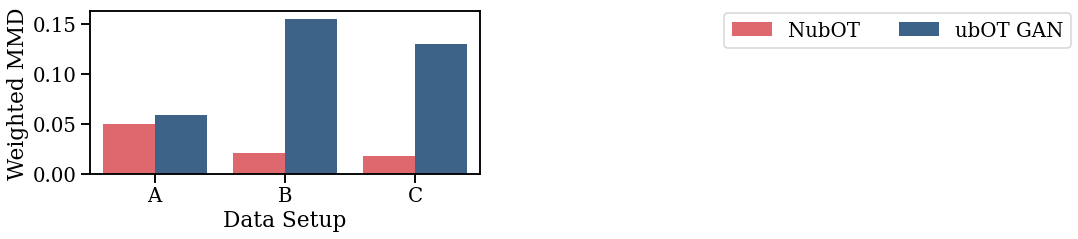

In [15]:
plt.figure(figsize=(7,3))
two=["#F2545B", "#316594", "#cccccc", "#b0aeae", "#878784","#A4243B"]

#plt.rcParams["font.size"] = 11
sns.set_context(context='talk', font_scale=1.2)

labels = {"mmd_w": "Weighted MMD", "w2_w": "Weighted Wasserstein Distance"}
sb = rv[rv["model"] != "model-cellot"]
sb = sb[sb["setup"].isin(["A", "B", "C"])]
metric = "mmd_w"
log = False
hue_order=["NubOT","ubOT GAN"]
g = sns.barplot(data=sb, y=metric, x="setup", hue="model", log=log, palette=two, order=["A", "B", "C"])
plt.xticks()
if metric in labels.keys():
    label = labels[metric]
else:
    label = metric
plt.legend(bbox_to_anchor=(1.6, 1.05), ncol=len(hue_order))
g.set(ylabel=label, xlabel="Data Setup")
#plt.savefig("toy_mmd.pdf", format="pdf", bbox_inches="tight")
plt.show()